### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')


In [201]:
# Constants
SHARED_FOLDER = 'shared'

DATA = 'data'
TARGET = 'target'
FEAT = 'feature_names'
PRICE = 'price'

TEST_SIZE = .2
RANDOM_STATE = 42
N_COMPONENTS = 2
LEARNING_RATE = 250


In [202]:
# Get Data
def get_data(test_size=TEST_SIZE, random_state=RANDOM_STATE):
    Source = load_boston()
    X = pd.DataFrame(Source[DATA], columns=Source[FEAT])
#     y = pd.DataFrame(Source[TARGET], columns=[PRICE])
    
    return train_test_split(
        pd.DataFrame(Source[DATA], columns=Source[FEAT]),
        Source[TARGET],
        test_size=TEST_SIZE, 
        random_state=RANDOM_STATE
    )


In [203]:
# Get Scaler Model
def get_scaler_model(data, use_scaler=StandardScaler):
    Scaler = use_scaler()
    return Scaler.fit(data)


In [204]:
# Train Model
def train_model(
    data, 
    use_model=TSNE,
    n_components = N_COMPONENTS, 
    learning_rate=LEARNING_RATE, 
    random_state=RANDOM_STATE
):
    Model = use_model(n_components=n_components, learning_rate=learning_rate, random_state = random_state)
    return Model.fit_transform(data)
    

In [205]:
def draw_scatterplot_chart(data):
    plt.scatter(data[:, 0], data[:, 1])
    plt.show()
    

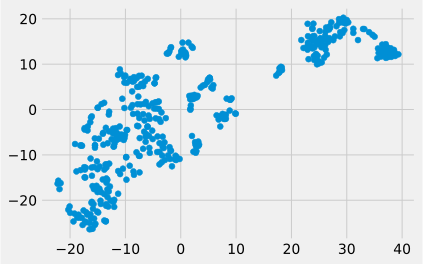

In [208]:
# Solution
X_train, X_test, y_train, y_test = get_data()
scaler_model = get_scaler_model(X_train)

X_train_scaled = pd.DataFrame(scaler_model.transform(X_train), columns=X_train.columns)
X_test_scaled =  pd.DataFrame(scaler_model.transform(X_test), columns=X_test.columns)

X_train_tsne = train_model(X_train_scaled)

draw_scatterplot_chart(X_train_tsne)


In [209]:
# Save data to reuse
for dataset in [
    (X_train, 'X_train'),
    (X_train_scaled, 'X_train_scaled'),
    (X_train_tsne, 'X_train_tsne'),
    (y_train, 'y_train'),
    (X_test, 'X_test'),
    (X_test_scaled, 'X_test_scaled'),
    (y_test, 'y_test')
]:
    data, filename = dataset[0], dataset[1]
    path = f'{SHARED_FOLDER}/{filename}.csv'
    
    if isinstance(data, np.ndarray):
        np.savetxt(path, data, delimiter=',')
    else:
        data.to_csv(path)
